<a href="https://colab.research.google.com/github/MoizAhmed2517/Deep_Learning_Projects/blob/main/Intro_to_CNN_and_Computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to CNN and Computer Vision

## Getting the Data

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-11-18 21:31:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 2607:f8b0:4023:c0d::80
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   139MB/s    in 0.8s    

2022-11-18 21:31:57 (139 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
# Above loaded data set is for binary CNN. 

## Inspect the Data

A very crucial step becomming one with the data means visualize it according to deep learning model requirement

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/pizza 

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [5]:
# checking the number of files in pizza_steak directory

In [6]:
# checking number of files in pizza_steak training steak folder
import os
dirPath = '/content/pizza_steak/train/steak'
count = 0
for path in os.listdir(dirPath):
  if os.path.isfile(os.path.join(dirPath, path)):
    count+=1
print('Number of Files:', count)

Number of Files: 750


In [7]:
dirPath = '/content/pizza_steak/train/pizza'
count = 0
for path in os.listdir(dirPath):
  if os.path.isfile(os.path.join(dirPath, path)):
    count+=1
print('Number of Files:', count)

Number of Files: 750


In [8]:
# Using os.walk() function istead of running multiple functions

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


### We have 250 images in testing and 750 images in training dataset

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [10]:
# Visualizing our image

steak = os.listdir("pizza_steak/train/steak")
pizza = os.listdir("pizza_steak/train/pizza")

In [11]:
import pathlib

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [12]:
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + "/" + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}")
  return img

Image shape: (512, 512, 3)


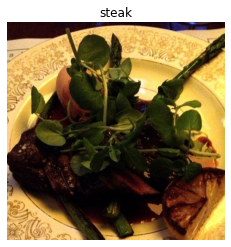

In [13]:
img = view_random_image("pizza_steak/train", "steak")

### Different shape in random Images

Scaling to be applied before passing it to neural network. and images to be same size.

In [14]:
# Converting image into tensor

tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 44,  15,  19],
        [ 35,   6,  10],
        [ 33,   2,   7],
        ...,
        [ 36,  10,  11],
        [ 34,   8,   9],
        [ 35,   6,   8]],

       [[ 33,   4,   6],
        [ 33,   4,   6],
        [ 37,   7,   9],
        ...,
        [ 37,  11,  12],
        [ 41,  12,  14],
        [ 41,  12,  14]],

       [[ 35,   6,   8],
        [ 34,   5,   7],
        [ 34,   4,   6],
        ...,
        [ 38,   9,  11],
        [ 39,  10,  12],
        [ 39,   9,  11]],

       ...,

       [[214, 173, 109],
        [197, 156,  92],
        [168, 124,  61],
        ...,
        [240, 187, 107],
        [225, 172,  94],
        [223, 170,  92]],

       [[195, 154,  92],
        [179, 138,  76],
        [170, 126,  65],
        ...,
        [243, 192, 113],
        [231, 179, 103],
        [222, 170,  94]],

       [[180, 139,  77],
        [186, 145,  83],
        [191, 146,  87],
        ...,
        [235, 184, 10

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# setup paths to our data directory
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Building a CNN (same as tiny VGG on the CNN explainer Website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224,224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our model

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data, 
                        epochs=5, 
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 143s 3s/step - loss: 0.5745 - accuracy: 0.6853 - val_loss: 0.3998 - val_accuracy: 0.8340
Epoch 2/5
47/47 [==============================] - 114s 2s/step - loss: 0.4094 - accuracy: 0.8187 - val_loss: 0.3157 - val_accuracy: 0.8640
Epoch 3/5
11/47 [======>.......................] - ETA: 1:25 - loss: 0.4170 - accuracy: 0.8153

In [ ]:
#Trying above same model like ANN and checking what will be the result

In [ ]:
tf.random.set_seed(42)

#create a model to replicate the Tf ANN model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    # tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

In [ ]:
model_1.summary()

In [ ]:
model_2.summary()

In [ ]:
model_3.summary()

In [ ]:
# Improved model_3 with increasing complexity by adding layer and hidden unit size and trainable parameters are 15,073,201 which are too much. And on this basis we recieved only 78% accuracy which is worst as compare with Tiny VGG model.

In [ ]:
# Breaking CNN to improve its efficiency:

In [ ]:
# 1) Becoming one with the data

plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train", "pizza") 

In [ ]:
# 2) Preprocess the data (prepare it for a model)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/train/"

# Creating batches: A small subset of data rather than looking all samples at a time. (It take 32 at a time. 32 bit-processing.# use this comand for checking your gpu !nvidia-smi)
# Trying to learn at a time is not actually good way. Learn bit by bit to so it can be improve in next iteration and also improve your health. said by Yann LeCun (Father of CNN)

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode="binary")
validation_data = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode="binary")

In [ ]:
images, labels = train_data.next() #get the next batch of images/label in train_data
len(images), len(labels)

In [ ]:
images[:2], images[0].shape

In [ ]:
# 3) Creating a CNN model

In [ ]:
# A baseline is a simple model or existing result that you setup when building a model. Pro Tip: Start with simple CNN

In [ ]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=5,
                           strides=1,
                           padding="valid",
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_4 = model_4.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=validation_data,
            validation_steps=len(validation_data))

In [ ]:
model_4.summary()

In [ ]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           padding="valid",
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_5 = model_5.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=validation_data,
            validation_steps=len(validation_data))

In [ ]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs, loss, label="Training Loss")
  plt.plot(epochs, loss, label="Val Loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legen()

  plt.figure()
  plt.plot(epochs, accuracy, label="Training Accuracy")
  plt.plot(epochs, accuracy, label="Val Accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legen()